# Import libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns #vẽ hình
from sklearn.preprocessing import LabelEncoder



# Import dataset 

In [ ]:
df = pd.read_excel('ML_DATA_FINAL.xlsx',sheet_name=None)
df

{'2020':       no firmcode                                           firmname  \
 0      1   CHP.HM                             Central Hydropower JSC   
 1      2   POM.HM                                  Pomina Steel Corp   
 2      3   V21.HN                                   Vinaconex 21 JSC   
 3      4   LIG.HN                                      Licogi 13 JSC   
 4      5   MCC.HN                         High Grade Brick Tile Corp   
 ..   ...      ...                                                ...   
 747  748   DAG.HM                           Dong A Plastic Group JSC   
 748  749   PVL.HN                       Viet Property Investment JSC   
 749  750   CCI.HM  CuChi Commercial and Industrial Developing Inv...   
 750  751   PPP.HN                       Phong Phu Pharmaceutical JSC   
 751  752   IJC.HM             Becamex Infrastructure Development JSC   
 
          totalasset       roa totalcurrentasset      totaldebt    totalequity  \
 0     3532764723610  7.792693  

In [ ]:
df.keys()

dict_keys(['2021', '2020'])

In [ ]:
df = pd.concat(df, ignore_index=True)

In [ ]:
df

,no,firmcode,firmname,totalasset,roa,totalcurrentasset,totaldebt,totalequity,currentliabilities,cash_dividend,freecashflow,revenue,commonshares_outstanding,Price_Close,EBIT,RE,industry
0,1,CHP.HM,Central Hydropower JSC,3272703458540.0,0.071141,395359537730.0,1261980213570.0,1894194143810.0,325325368540.0,235523936800.0,223552740190.0,787447457860.0,146912670.0,21432.433750,3.664518e+11,304405135930.0,Utilities
1,2,POM.HM,Pomina Steel Corp,12684899592210.0,0.017315,7856385602440.0,6513490523550.0,3709682900910.0,7844431080660.0,NaN,482081130330.0,13999252169230.0,278543600.0,14650.000000,5.754150e+11,657837041660.0,Basic Materials
2,3,V21.HN,Vinaconex 21 JSC,335579886720.0,0.009606,242841896580.0,40435660670.0,120917661400.0,188845815220.0,NaN,4991456450.0,125499975940.0,11999790.0,13900.000000,7.491891e+09,259022070.0,Industrials
3,4,LIG.HN,Licogi 13 JSC,5192754538200.0,0.008785,3480836199480.0,1469638274980.0,709545980430.0,3276833705820.0,0.0,-127186202530.0,2439778222620.0,64034120.0,19400.000000,-1.301518e+10,52006205490.0,Industrials
4,5,MCC.HN,High Grade Brick Tile Corp,92957144460.0,0.023925,26202345950.0,4000000000.0,71033770230.0,21190910610.0,0.0,-2091286090.0,40953605310.0,4986120.0,10923.337100,2.785543e+09,3262543070.0,Basic Materials
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1499,748,DAG.HM,Dong A Plastic Group JSC,1739729427870,0.582609,992581167050,791393001530,676864630700,851071667950,NaN,-160979124140,1756945906230,51793792.0,16135.200469,1.634842e+10,97297298130,Consumer Cyclicals
1500,749,PVL.HN,Viet Property Investment JSC,399026732280,0.162267,147923909900,0,235343592060,162563013840,NaN,2910572750,23226030150,50000000.0,10542.431199,1.287728e+10,-277332320700,Real Estate
1501,750,CCI.HM,CuChi Commercial and Industrial Developing Inv...,692860266500,4.356212,293005633890,0,275405635200,25810030210,12997451660,15749818740,290363485930,17541105.0,23030.000000,5.161907e+11,35665396300,Energy
1502,751,PPP.HN,Phong Phu Pharmaceutical JSC,144659074880,6.4501,54890989030,11101650290,107595959690,31164864910,6617578150,8256263000,116921908360,8799991.0,NaN,NaN,10876381500,Healthcare


In [ ]:
df = df.sort_values('firmcode')

In [ ]:
df['industry'].value_counts()

Industrials               400
Basic Materials           268
Consumer Cyclicals        182
Real Estate               162
Consumer Non-Cyclicals    140
Financials                112
Energy                     88
Utilities                  72
Healthcare                 42
Technology                 38
Name: industry, dtype: int64

Professor Edward Altman's Z-Score model is based on statistical analysis methods on manufacturing companies. Therefore, we only selected companies in the manufacturing industry

In [ ]:
list_industry = ['Industrials', 'Basic Materials', 'Consumer Cyclicals', 'Consumer Non-Cyclicals', 'Utilities', 'Technology', 'Energy']
df = df[df['industry'].isin(list_industry)]

In [ ]:
df['industry'].value_counts()

Industrials               400
Basic Materials           268
Consumer Cyclicals        182
Consumer Non-Cyclicals    140
Energy                     88
Utilities                  72
Technology                 38
Name: industry, dtype: int64

In [ ]:
df = df.reset_index()

In [ ]:
df.columns

Index(['index', 'no', 'firmcode', 'firmname', 'totalasset', 'roa',
       'totalcurrentasset', 'totaldebt', 'totalequity', 'currentliabilities',
       'cash_dividend', 'freecashflow', 'revenue', 'commonshares_outstanding',
       'Price_Close', 'EBIT', 'RE', 'industry'],
      dtype='object')

In [ ]:
#filter out the necessary columns involved in calculating the categorical features of our model
columns = ['firmcode','firmname','totalasset','totalcurrentasset','currentliabilities','totalequity','revenue','commonshares_outstanding','Price_Close','EBIT','RE']
data = df[columns]

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   firmcode                  1188 non-null   object 
 1   firmname                  1188 non-null   object 
 2   totalasset                1182 non-null   object 
 3   totalcurrentasset         1181 non-null   object 
 4   currentliabilities        1182 non-null   object 
 5   totalequity               1182 non-null   object 
 6   revenue                   1182 non-null   object 
 7   commonshares_outstanding  1169 non-null   float64
 8   Price_Close               1147 non-null   float64
 9   EBIT                      1175 non-null   float64
 10  RE                        1181 non-null   object 
dtypes: float64(3), object(8)
memory usage: 102.2+ KB


In [ ]:
#fill na 
col = ['totalasset','totalcurrentasset','currentliabilities','totalequity','revenue','commonshares_outstanding','Price_Close','EBIT','RE']
data[col] = data[col]._convert(numeric=True)
data[col] = data[col].fillna(data[col].mean())
data['commonshares_outstanding'] = data['commonshares_outstanding'].fillna(data['commonshares_outstanding'].median())

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#Calculate MV of equity & total liabilities
data['MV of equity'] = data['Price_Close']*data['commonshares_outstanding']
data['Total Liabilities'] = data['totalasset'] - data['totalequity']


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#Calculate categorical features
data['X1'] = (data['totalcurrentasset'] - data['currentliabilities'])/data['totalasset']
data['X2'] = data['RE']/data['totalasset']
data['X3'] = data['EBIT']/data['totalasset']
data['X4'] = data['MV of equity']/data['Total Liabilities']
data['X5'] = data['revenue']/data['totalasset']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
#filter out main data
maincol = ['firmcode', 'X1', 'X2', 'X3','X4','X5']
maindata = data[maincol]
maindata= maindata.fillna(maindata.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  after removing the cwd from sys.path.


In [ ]:
#Calculate Z-score based on the model of Edward I.Altman
maindata['z-score'] = 1.21*maindata['X1'] + 1.4*maindata['X2'] + 3.3*maindata['X3'] + 0.6*maindata['X4'] + 0.999*maindata['X5']
maindata

,firmcode,X1,X2,X3,X4,X5,z-score
0,AAA.HM,0.207030,0.070582,0.000385,1.020296,1.313060,2.274516
1,AAA.HM,0.084395,0.066366,0.000017,0.178413,0.866869,1.168137
2,AAM.HM,0.738919,-0.009487,0.344378,16.248341,0.573413,12.339103
3,AAM.HM,0.783232,-0.008825,0.348945,20.095397,0.666925,14.810372
4,AAT.HM,0.138642,0.131886,0.041100,16.003228,0.495114,10.584584
...,...,...,...,...,...,...,...
1183,WCS.HN,0.773247,0.162697,1.028695,5.422716,0.294687,8.106121
1184,YBM.HM,0.025702,0.068246,0.092653,0.382370,1.015068,1.675874
1185,YBM.HM,0.017943,0.082981,0.072885,0.522293,1.130942,1.821592
1186,YEG.HM,0.391936,-0.158328,-0.170072,2.779584,0.879889,2.238105


In [ ]:
#Create dependent variable
maindata.loc[maindata['z-score'] >= 2.99, 'Status'] = 'Safe'
maindata.loc[(maindata['z-score'] < 2.99) & (maindata['z-score'] > 1.81), 'Status'] = 'Gray'
maindata.loc[maindata['z-score'] < 1.81, 'Status'] = 'Distress'

Safe = 0 
Gray = 1 
Distress  = 2 

In [ ]:
encoder_status = LabelEncoder() #creating label encoder object
maindata["Status"] = encoder_status.fit_transform(maindata["Status"]).copy() #converting to numberical for Status attribute

In [ ]:
maindata

,firmcode,X1,X2,X3,X4,X5,z-score,Status
0,AAA.HM,0.207030,0.070582,0.000385,1.020296,1.313060,2.274516,1
1,AAA.HM,0.084395,0.066366,0.000017,0.178413,0.866869,1.168137,0
2,AAM.HM,0.738919,-0.009487,0.344378,16.248341,0.573413,12.339103,2
3,AAM.HM,0.783232,-0.008825,0.348945,20.095397,0.666925,14.810372,2
4,AAT.HM,0.138642,0.131886,0.041100,16.003228,0.495114,10.584584,2
...,...,...,...,...,...,...,...,...
1183,WCS.HN,0.773247,0.162697,1.028695,5.422716,0.294687,8.106121,2
1184,YBM.HM,0.025702,0.068246,0.092653,0.382370,1.015068,1.675874,0
1185,YBM.HM,0.017943,0.082981,0.072885,0.522293,1.130942,1.821592,1
1186,YEG.HM,0.391936,-0.158328,-0.170072,2.779584,0.879889,2.238105,1


***Correlation matrix***

In [ ]:
target = ['Status']
categorical_features = ['X1','X2','X3','X4','X5']

In [ ]:
matrix = maindata.drop(columns=['firmcode','z-score']).corr()

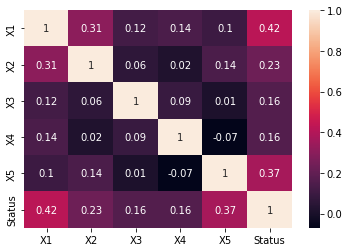

In [ ]:
sns.heatmap(matrix.round(2), annot=True)
plt.show()

***Descriptive statistics***

In [ ]:
maindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1188 entries, 0 to 1187
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   firmcode  1188 non-null   object 
 1   X1        1188 non-null   float64
 2   X2        1188 non-null   float64
 3   X3        1188 non-null   float64
 4   X4        1188 non-null   float64
 5   X5        1188 non-null   float64
 6   z-score   1188 non-null   float64
 7   Status    1188 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 74.4+ KB


In [ ]:
maindata[target].value_counts()

Status
2         518
0         390
1         280
dtype: int64

In [ ]:
maindata[categorical_features].describe()

,X1,X2,X3,X4,X5
count,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000
mean,0.219061,0.066648,0.796858,5.552552,1.159462
std,0.242828,0.143272,7.828531,29.433300,1.205400
min,-0.565919,-1.358341,-105.074571,0.011331,-0.047302
25%,0.063032,0.024061,0.006798,0.505868,0.433348
50%,0.178579,0.063142,0.048194,1.126240,0.848151
75%,0.358670,0.125625,0.152108,3.065611,1.453104
max,2.568274,0.629515,156.421224,817.553646,10.910511


***Check missing values***

In [ ]:
maindata.isnull().sum()

firmcode    0
X1          0
X2          0
X3          0
X4          0
X5          0
z-score     0
Status      0
dtype: int64

***Visualization***

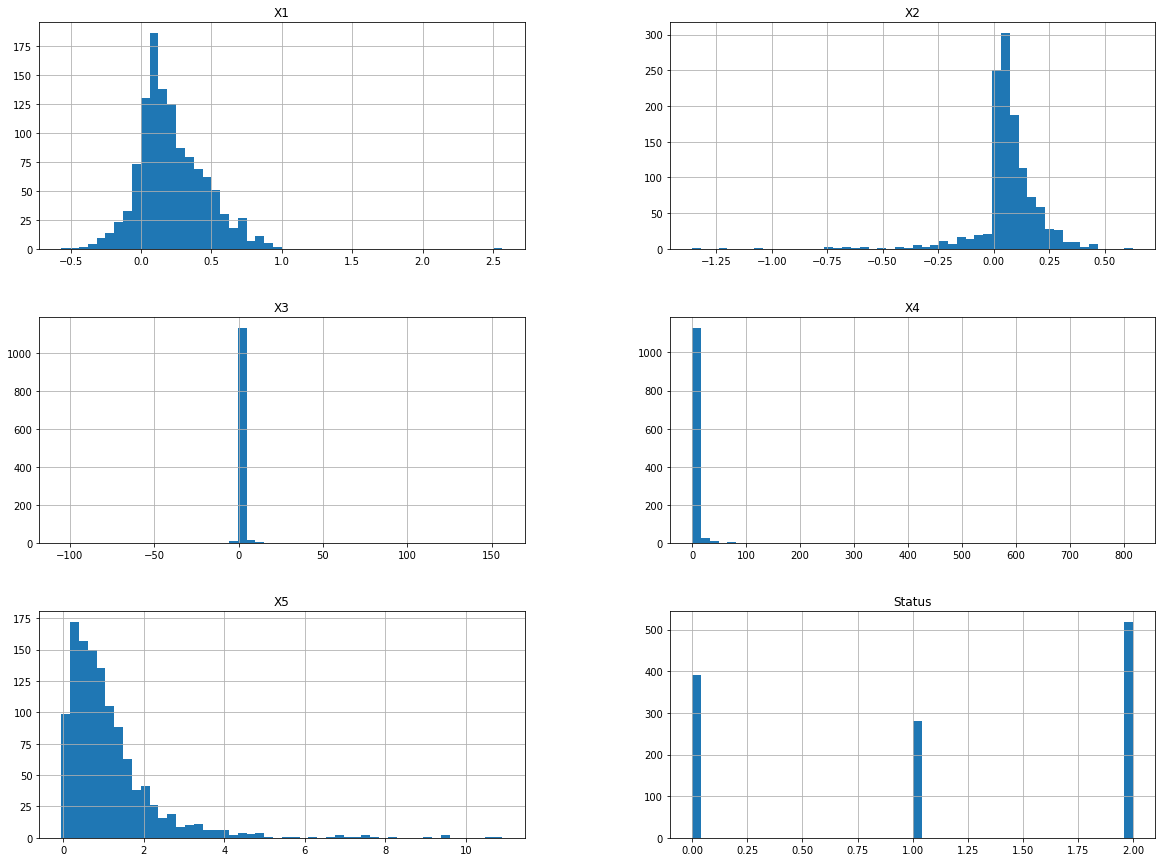

In [ ]:
%matplotlib inline
#Creating histogram for numerical attributes
maindata.drop(columns=['firmcode','z-score']).hist(bins=50, figsize=(20,15))
plt.show()

#**Build model**

In [ ]:
# Import libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import train_test_split
from six import StringIO
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus


In [ ]:
X = maindata[categorical_features].values
y = maindata[target].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[2 2]
 [0 0]
 [1 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 2]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [2 2]
 [1 2]
 [0 0]
 [2 2]
 [1 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [0 0]
 [0 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [0 0]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 1]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 1]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 1]
 [0 1]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [2 0]
 [1 0]
 [2 2]
 [1 1]
 [2 1]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [1 0]
 [0 0]

In [ ]:
#Predection
DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train.ravel())

y_pred = DT_classifier.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print('Decision Tree accuracy: ', accuracy_score(y_test, y_pred))

[[72  8  0]
 [ 7 43  6]
 [ 0  6 96]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.91        80
           1       0.75      0.77      0.76        56
           2       0.94      0.94      0.94       102

    accuracy                           0.89       238
   macro avg       0.87      0.87      0.87       238
weighted avg       0.89      0.89      0.89       238

Decision Tree accuracy:  0.8865546218487395


In [ ]:
df_report = pd.DataFrame({'Ground Truth':y_test.ravel(), 'Prediction':y_pred.ravel()})
df_report

,Ground Truth,Prediction
0,2,2
1,0,0
2,0,1
3,2,2
4,0,0
...,...,...
233,0,0
234,2,2
235,2,2
236,0,1


In [ ]:
#Feature importance
importance_dt = classifier.feature_importances_
features_importances_dt = pd.DataFrame({'FeatureName': maindata.columns[1:-2], 'Decision Tree Feature Importance': importance_dt})
features_importances_dt.sort_values(by=['Decision Tree Feature Importance'], ascending=False)

,FeatureName,Decision Tree Feature Importance
3,X4,0.374804
4,X5,0.272806
2,X3,0.201637
0,X1,0.085270
1,X2,0.065483


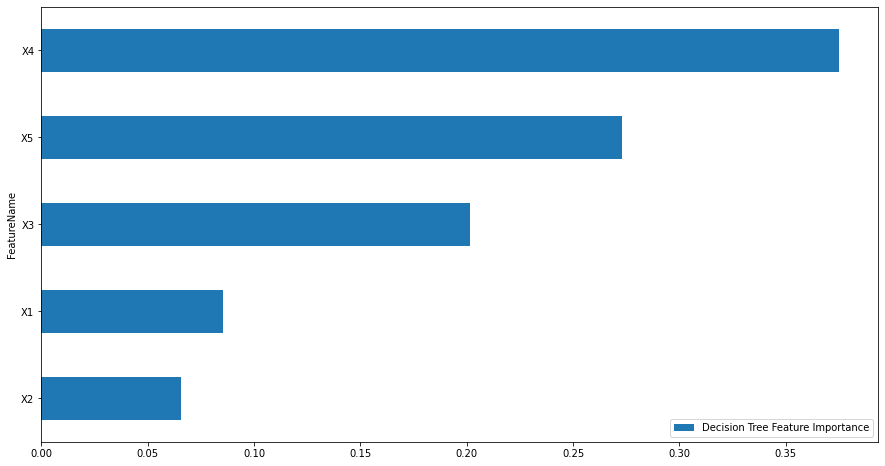

In [ ]:
features_importances_dt.sort_values("Decision Tree Feature Importance").plot(figsize=(15,8), x="FeatureName", y=["Decision Tree Feature Importance"], kind="barh")

In [ ]:
#Plot Tree
X_plot_tree = maindata.iloc[:, 1:-2]
X_plot_tree

,X1,X2,X3,X4,X5
0,0.207030,0.070582,0.000385,1.020296,1.313060
1,0.084395,0.066366,0.000017,0.178413,0.866869
2,0.738919,-0.009487,0.344378,16.248341,0.573413
3,0.783232,-0.008825,0.348945,20.095397,0.666925
4,0.138642,0.131886,0.041100,16.003228,0.495114
...,...,...,...,...,...
1183,0.773247,0.162697,1.028695,5.422716,0.294687
1184,0.025702,0.068246,0.092653,0.382370,1.015068
1185,0.017943,0.082981,0.072885,0.522293,1.130942
1186,0.391936,-0.158328,-0.170072,2.779584,0.879889


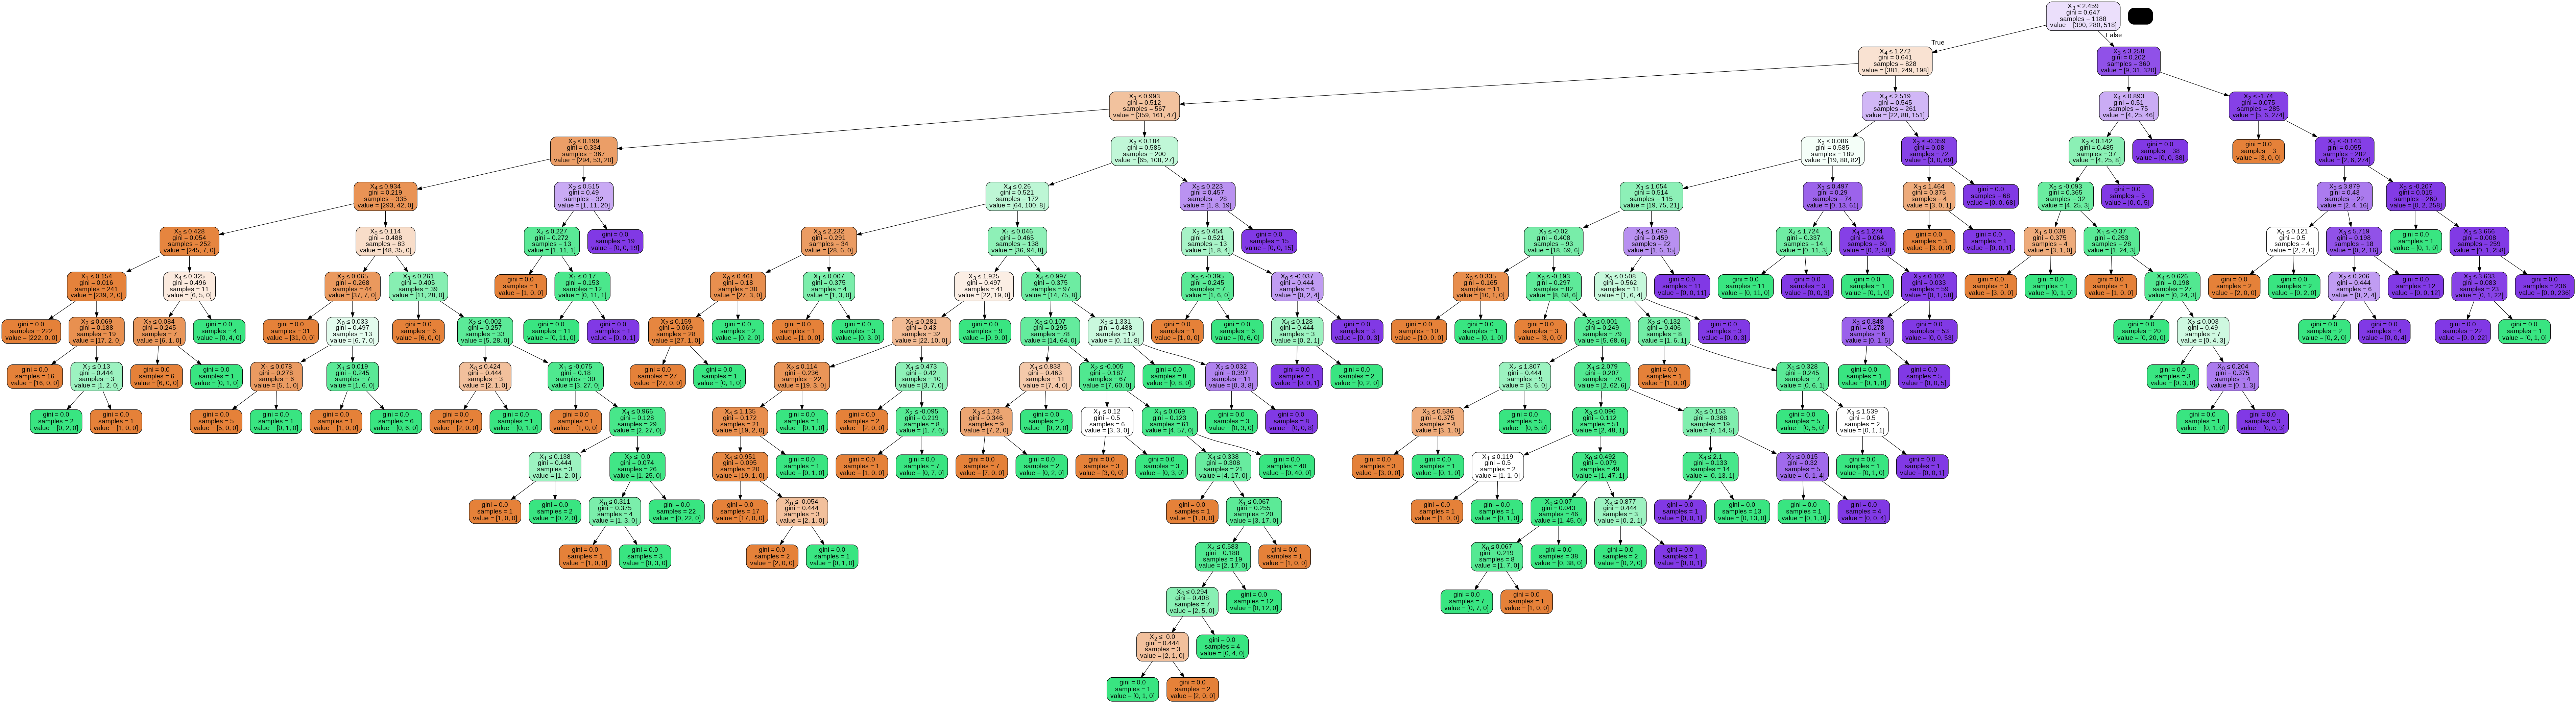

In [ ]:
dot_data = StringIO()

clf = DecisionTreeClassifier()
clf.fit(X_plot_tree.values, y.ravel())
export_graphviz(clf, out_file=dot_data,  filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [ ]:
for i in range(len(X_plot_tree.columns)):
  print('X_%s'%i, end = ': ')
  print(X_plot_tree.columns[i])

X_0: X1
X_1: X2
X_2: X3
X_3: X4
X_4: X5
